In [ ]:
# Shape Generation problem
# we can use random width and height to define 4 points of the rectangle
# in a clockwise direction starting at x = 0, y = 0


In [1]:
from random import random

def gen_rectangle():
    points = list()
    height,width = random(),random()
    
    points.append([0,0])
    
    points.append([width,0])
    
    points.append([width,height])
    
    points.append([0,height])
    
    return points
    

In [3]:
rect = gen_rectangle()

print(rect)

[[0, 0], [0.7729001509186568, 0], [0.7729001509186568, 0.6927451654606885], [0, 0.6927451654606885]]


In [12]:
# Plot rectangles
# we use path movements 
# path is a series of movements such as MOVETO to start the sequence,
# LINETO to connect points and CLOSEPOLY to close the polygon

import matplotlib.pyplot as plt 
from matplotlib.patches import PathPatch
from matplotlib.path import Path

def plot_rectangle(rect):
    rect.append(rect[0])
    
    codes = [Path.MOVETO, Path.LINETO,Path.LINETO,Path.LINETO,Path.CLOSEPOLY]
    
    path = Path(rect,codes)
 
    axis = plt.gca()
    
    patch = PathPatch(path)
    #add shape to plot
    axis.add_patch(patch)
    axis.set_xlim(-0.1,1.1)
    axis.set_ylim(-0.1,1.1)
    plt.show()



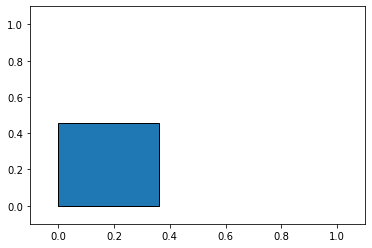

In [13]:
rect = gen_rectangle()
plot_rectangle(rect)

In [15]:
# generate input and output seq for a random generated rectangle
import numpy as np
def get_samples():
    rect = gen_rectangle()
    X = list()
    y = list()
    
    for i in range(1,len(rect)):
        X.append(rect[i-1])
        y.append(rect[i])
    
    # convert input seq to have 1 time step and 2 features
    X,y = np.array(X),np.array(y)
    X = X.reshape((X.shape[0],1,2))
    return X,y

In [17]:
import tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [20]:
# define and compile the model
# our model is expecting 1 time step input with 2 features for the x and y coordinates
# the output of the network is a single coordinate comprised of x and y values

model = Sequential()
model.add(LSTM(10, input_shape=(1, 2)))
model.add(Dense(2, activation='linear'))
model.compile(loss='mae',optimizer='adam')
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 10)                520       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 22        
Total params: 542
Trainable params: 542
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
# Fit the model

for i in range(25000):
    X, y = get_samples()
    model.fit(X,y,epochs=1,shuffle=False)

1/1 [==============================] - 0s 5ms/step - loss: 0.2731


1/1 [==============================] - 0s 5ms/step - loss: 0.2084


1/1 [==============================] - 0s 5ms/step - loss: 0.1640


1/1 [==============================] - 0s 6ms/step - loss: 0.1766


1/1 [==============================] - 0s 5ms/step - loss: 0.1337


1/1 [==============================] - 0s 5ms/step - loss: 0.0887


1/1 [==============================] - 0s 6ms/step - loss: 0.1668


1/1 [==============================] - 0s 6ms/step - loss: 0.2550


1/1 [==============================] - 0s 5ms/step - loss: 0.1653


1/1 [==============================] - 0s 5ms/step - loss: 0.1549


1/1 [==============================] - 0s 6ms/step - loss: 0.1842


1/1 [==============================] - 0s 9ms/step - loss: 0.1635


1/1 [==============================] - 0s 7ms/step - loss: 0.2056


1/1 [==============================] - 0s 6ms/step - loss: 0.1557


1/1 [==============================] - 0s 3ms/step - loss: 0.1309


1/1 [==============================] - 0s 6ms/step - loss: 0.1481


1/1 [==============================] - 0s 12ms/step - loss: 0.1111


1/1 [==============================] - 0s 5ms/step - loss: 0.2370


1/1 [==============================] - 0s 6ms/step - loss: 0.1699


1/1 [==============================] - 0s 5ms/step - loss: 0.2713


1/1 [==============================] - 0s 4ms/step - loss: 0.1118


1/1 [==============================] - 0s 6ms/step - loss: 0.1770


1/1 [==============================] - 0s 7ms/step - loss: 0.1097


1/1 [==============================] - 0s 6ms/step - loss: 0.1693


1/1 [==============================] - 0s 5ms/step - loss: 0.1898


1/1 [==============================] - 0s 4ms/step - loss: 0.1669


1/1 [==============================] - 0s 6ms/step - loss: 0.2410


1/1 [==============================] - 0s 6ms/step - loss: 0.2350


1/1 [==============================] - 0s 6ms/step - loss: 0.2085


1/1 [==============================] - 0s 6ms/step - loss: 0.1767


1/1 [==============================] - 0s 6ms/step - loss: 0.2177


1/1 [==============================] - 0s 5ms/step - loss: 0.1947


1/1 [==============================] - 0s 5ms/step - loss: 0.1717


1/1 [==============================] - 0s 6ms/step - loss: 0.1621


1/1 [==============================] - 0s 5ms/step - loss: 0.1761


1/1 [==============================] - 0s 6ms/step - loss: 0.1928


1/1 [==============================] - 0s 6ms/step - loss: 0.2764


1/1 [==============================] - 0s 6ms/step - loss: 0.0974


1/1 [==============================] - 0s 4ms/step - loss: 0.1259


1/1 [==============================] - 0s 6ms/step - loss: 0.2843


1/1 [==============================] - 0s 5ms/step - loss: 0.1479


1/1 [==============================] - 0s 5ms/step - loss: 0.0718


1/1 [==============================] - 0s 6ms/step - loss: 0.1099


1/1 [==============================] - 0s 7ms/step - loss: 0.0770


1/1 [==============================] - 0s 5ms/step - loss: 0.1637


1/1 [==============================] - 0s 6ms/step - loss: 0.1034


1/1 [==============================] - 0s 6ms/step - loss: 0.1557


1/1 [==============================] - 0s 6ms/step - loss: 0.1318


1/1 [==============================] - 0s 5ms/step - loss: 0.1121


1/1 [==============================] - 0s 6ms/step - loss: 0.1157


1/1 [==============================] - 0s 5ms/step - loss: 0.1121


1/1 [==============================] - 0s 6ms/step - loss: 0.1139


1/1 [==============================] - 0s 5ms/step - loss: 0.1894


1/1 [==============================] - 0s 5ms/step - loss: 0.0767


1/1 [==============================] - 0s 6ms/step - loss: 0.1086


1/1 [==============================] - 0s 6ms/step - loss: 0.0800


1/1 [==============================] - 0s 9ms/step - loss: 0.1106


1/1 [==============================] - 0s 4ms/step - loss: 0.0390


1/1 [==============================] - 0s 8ms/step - loss: 0.0779


1/1 [==============================] - 0s 8ms/step - loss: 0.1921


1/1 [==============================] - 0s 6ms/step - loss: 0.1259


1/1 [==============================] - 0s 6ms/step - loss: 0.1040


1/1 [==============================] - 0s 7ms/step - loss: 0.1252


1/1 [==============================] - 0s 6ms/step - loss: 0.0735


1/1 [==============================] - 0s 6ms/step - loss: 0.1044


1/1 [==============================] - 0s 7ms/step - loss: 0.1215


1/1 [==============================] - 0s 6ms/step - loss: 0.1422


1/1 [==============================] - 0s 7ms/step - loss: 0.1220


1/1 [==============================] - 0s 6ms/step - loss: 0.1788


1/1 [==============================] - 0s 6ms/step - loss: 0.1311


1/1 [==============================] - 0s 6ms/step - loss: 0.0164


1/1 [==============================] - 0s 5ms/step - loss: 0.0786


1/1 [==============================] - 0s 6ms/step - loss: 0.0991


1/1 [==============================] - 0s 6ms/step - loss: 0.0671


1/1 [==============================] - 0s 6ms/step - loss: 0.0645


1/1 [==============================] - 0s 6ms/step - loss: 0.0740


1/1 [==============================] - 0s 6ms/step - loss: 0.1821


1/1 [==============================] - 0s 5ms/step - loss: 0.1610


1/1 [==============================] - 0s 6ms/step - loss: 0.0927


1/1 [==============================] - 0s 7ms/step - loss: 0.1239


1/1 [==============================] - 0s 6ms/step - loss: 0.0676


1/1 [==============================] - 0s 5ms/step - loss: 0.0895


1/1 [==============================] - 0s 6ms/step - loss: 0.0560


1/1 [==============================] - 0s 6ms/step - loss: 0.0822


1/1 [==============================] - 0s 5ms/step - loss: 0.0908


1/1 [==============================] - 0s 5ms/step - loss: 0.0626


1/1 [==============================] - 0s 6ms/step - loss: 0.0876


1/1 [==============================] - 0s 6ms/step - loss: 0.1576


1/1 [==============================] - 0s 6ms/step - loss: 0.0166


1/1 [==============================] - 0s 6ms/step - loss: 0.1140


1/1 [==============================] - 0s 6ms/step - loss: 0.1019


1/1 [==============================] - 0s 5ms/step - loss: 0.3151


1/1 [==============================] - 0s 6ms/step - loss: 0.0318


1/1 [==============================] - 0s 5ms/step - loss: 0.1438


1/1 [==============================] - 0s 5ms/step - loss: 0.1640


1/1 [==============================] - 0s 6ms/step - loss: 0.1527


1/1 [==============================] - 0s 6ms/step - loss: 0.0644


1/1 [==============================] - 0s 6ms/step - loss: 0.0708


1/1 [==============================] - 0s 6ms/step - loss: 0.0975


1/1 [==============================] - 0s 6ms/step - loss: 0.0691


1/1 [==============================] - 0s 6ms/step - loss: 0.0989


1/1 [==============================] - 0s 6ms/step - loss: 0.0856


1/1 [==============================] - 0s 5ms/step - loss: 0.0805


1/1 [==============================] - 0s 6ms/step - loss: 0.1304


1/1 [==============================] - 0s 5ms/step - loss: 0.0767


1/1 [==============================] - 0s 6ms/step - loss: 0.1580


1/1 [==============================] - 0s 6ms/step - loss: 0.0497


1/1 [==============================] - 0s 5ms/step - loss: 0.3123


1/1 [==============================] - 0s 5ms/step - loss: 0.1226


1/1 [==============================] - 0s 6ms/step - loss: 0.0448


1/1 [==============================] - 0s 5ms/step - loss: 0.1840


1/1 [==============================] - 0s 6ms/step - loss: 0.0981


1/1 [==============================] - 0s 5ms/step - loss: 0.1147


1/1 [==============================] - 0s 5ms/step - loss: 0.0735


1/1 [==============================] - 0s 6ms/step - loss: 0.1675


1/1 [==============================] - 0s 6ms/step - loss: 0.1886


1/1 [==============================] - 0s 5ms/step - loss: 0.1276


1/1 [==============================] - 0s 6ms/step - loss: 0.0990


1/1 [==============================] - 0s 6ms/step - loss: 0.1943


1/1 [==============================] - 0s 6ms/step - loss: 0.0823


1/1 [==============================] - 0s 5ms/step - loss: 0.2005


1/1 [==============================] - 0s 6ms/step - loss: 0.0598


1/1 [==============================] - 0s 5ms/step - loss: 0.1159


1/1 [==============================] - 0s 6ms/step - loss: 0.0706


1/1 [==============================] - 0s 5ms/step - loss: 0.0271


1/1 [==============================] - 0s 5ms/step - loss: 0.0981


1/1 [==============================] - 0s 5ms/step - loss: 0.1008


1/1 [==============================] - 0s 6ms/step - loss: 0.2373


1/1 [==============================] - 0s 5ms/step - loss: 0.1182


1/1 [==============================] - 0s 6ms/step - loss: 0.0362


1/1 [==============================] - 0s 5ms/step - loss: 0.0835


1/1 [==============================] - 0s 6ms/step - loss: 0.1248


1/1 [==============================] - 0s 5ms/step - loss: 0.1249


1/1 [==============================] - 0s 6ms/step - loss: 0.1945


1/1 [==============================] - 0s 5ms/step - loss: 0.0970


1/1 [==============================] - 0s 6ms/step - loss: 0.0646


1/1 [==============================] - 0s 5ms/step - loss: 0.0930


1/1 [==============================] - 0s 4ms/step - loss: 0.0959


1/1 [==============================] - 0s 5ms/step - loss: 0.1743


1/1 [==============================] - 0s 6ms/step - loss: 0.0370


1/1 [==============================] - 0s 6ms/step - loss: 0.1250


1/1 [==============================] - 0s 6ms/step - loss: 0.1268


1/1 [==============================] - 0s 6ms/step - loss: 0.2403


1/1 [==============================] - 0s 6ms/step - loss: 0.0520


1/1 [==============================] - 0s 6ms/step - loss: 0.1622


1/1 [==============================] - 0s 6ms/step - loss: 0.2171


1/1 [==============================] - 0s 5ms/step - loss: 0.1253


1/1 [==============================] - 0s 4ms/step - loss: 0.0879


1/1 [==============================] - 0s 6ms/step - loss: 0.1043


1/1 [==============================] - 0s 5ms/step - loss: 0.0913


1/1 [==============================] - 0s 6ms/step - loss: 0.0523


1/1 [==============================] - 0s 6ms/step - loss: 0.2141


1/1 [==============================] - 0s 5ms/step - loss: 0.0889


1/1 [==============================] - 0s 6ms/step - loss: 0.0805


1/1 [==============================] - 0s 6ms/step - loss: 0.0987


1/1 [==============================] - 0s 5ms/step - loss: 0.0441


1/1 [==============================] - 0s 6ms/step - loss: 0.2398


1/1 [==============================] - 0s 4ms/step - loss: 0.1413


1/1 [==============================] - 0s 5ms/step - loss: 0.1102


1/1 [==============================] - 0s 6ms/step - loss: 0.1907


1/1 [==============================] - 0s 6ms/step - loss: 0.0684


1/1 [==============================] - 0s 6ms/step - loss: 0.0577


1/1 [==============================] - 0s 6ms/step - loss: 0.0401


1/1 [==============================] - 0s 7ms/step - loss: 0.0910


1/1 [==============================] - 0s 5ms/step - loss: 0.1251


1/1 [==============================] - 0s 6ms/step - loss: 0.0237


1/1 [==============================] - 0s 5ms/step - loss: 0.1333


1/1 [==============================] - 0s 6ms/step - loss: 0.2162


1/1 [==============================] - 0s 6ms/step - loss: 0.1354


1/1 [==============================] - 0s 5ms/step - loss: 0.0291


1/1 [==============================] - 0s 5ms/step - loss: 0.0997


1/1 [==============================] - 0s 5ms/step - loss: 0.1912


1/1 [==============================] - 0s 5ms/step - loss: 0.0555


1/1 [==============================] - 0s 5ms/step - loss: 0.1064


1/1 [==============================] - 0s 5ms/step - loss: 0.0909


1/1 [==============================] - 0s 5ms/step - loss: 0.1619


1/1 [==============================] - 0s 6ms/step - loss: 0.2511


1/1 [==============================] - 0s 6ms/step - loss: 0.1604


1/1 [==============================] - 0s 5ms/step - loss: 0.1270


1/1 [==============================] - 0s 5ms/step - loss: 0.0831


1/1 [==============================] - 0s 6ms/step - loss: 0.1222


1/1 [==============================] - 0s 6ms/step - loss: 0.0916


1/1 [==============================] - 0s 6ms/step - loss: 0.1739


1/1 [==============================] - 0s 6ms/step - loss: 0.1453


1/1 [==============================] - 0s 6ms/step - loss: 0.0345


1/1 [==============================] - 0s 5ms/step - loss: 0.1117


1/1 [==============================] - 0s 5ms/step - loss: 0.0492


1/1 [==============================] - 0s 6ms/step - loss: 0.0864


1/1 [==============================] - 0s 5ms/step - loss: 0.2409


1/1 [==============================] - 0s 5ms/step - loss: 0.0899


1/1 [==============================] - 0s 6ms/step - loss: 0.0446


1/1 [==============================] - 0s 6ms/step - loss: 0.1450


1/1 [==============================] - 0s 5ms/step - loss: 0.1450


1/1 [==============================] - 0s 6ms/step - loss: 0.0821


1/1 [==============================] - 0s 8ms/step - loss: 0.1436


1/1 [==============================] - 0s 6ms/step - loss: 0.1292


1/1 [==============================] - 0s 6ms/step - loss: 0.0463


1/1 [==============================] - 0s 6ms/step - loss: 0.1284


1/1 [==============================] - 0s 6ms/step - loss: 0.0502


1/1 [==============================] - 0s 7ms/step - loss: 0.1028


1/1 [==============================] - 0s 6ms/step - loss: 0.1439


1/1 [==============================] - 0s 6ms/step - loss: 0.0927


1/1 [==============================] - 0s 6ms/step - loss: 0.1696


In [22]:
# use a lstm model to generate a new rectangle from scratch

def gen_rectangle(model):
    rect = list()
    last = np.array([0.0,0.0]).reshape((1,1,2))
    rect.append([[y for y in x] for x in last[0]][0])
    
    #generate the remaining 3 coordinates
    for i in range(3):
        # predict the next coordinate
        yhat = model.predict(last)
        
        last = yhat.reshape((1,1,2))
        
        rect.append([[y for y in x] for x in last[0]] [0])
    return rect

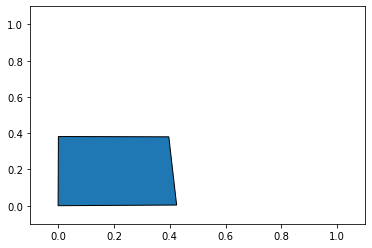

In [23]:
# generate new shapes from scratch
rect = gen_rectangle(model)
plot_rectangle(rect)